In [1]:
import os
from raphtory import Graph
from collections import Counter
from raphtory import algorithms as rp
import matplotlib.pyplot as plt
import pandas as pd

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_7"

# Load the file
if os.path.isfile(binecode_path):
    g = Graph.load_from_file(binecode_path)
    print(g)
else:
    print(f"File does not exist: {binecode_path}")

# Run a community detection algorithm which checks lcc in the graph
lcc =  rp.weakly_connected_components(g)

# Make it a dictionary
components_dict = lcc.get_all()

# Count the frequency of each component ID
component_sizes = Counter(components_dict.values())

# Find the top ten giant component
cc = component_sizes.most_common(2)

cc

Graph(number_of_edges=106799, number_of_vertices=27798, number_of_temporal_edges=194971247, earliest_time="21600000", latest_time="25199999")


[(193157771795751, 27245), (130146132959852630, 42)]

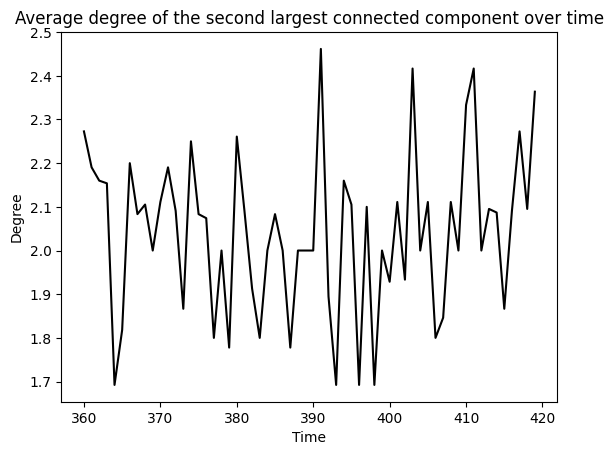

In [7]:
# Create a list to hold names of the nodes in the second largest connected component
cc_nodes = []

# Populate the list
for name, component_id in components_dict.items():
    if component_id == cc[1][0]:
        cc_nodes.append(name)

# Make a subgraph
cc_subgraph = g.subgraph(cc_nodes)
cc_subgraph


"""
Diagram which gives the average degree of the second largest connected component over time
"""
avg_degree = []
time = []

for windowed_graph in cc_subgraph.rolling(window=60000):
    result = rp.average_degree(windowed_graph)
    avg_degree.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, avg_degree, color='black')
plt.xlabel("Time")
plt.ylabel("Degree")
plt.title("Average degree of the second largest connected component over time")
plt.grid(False)

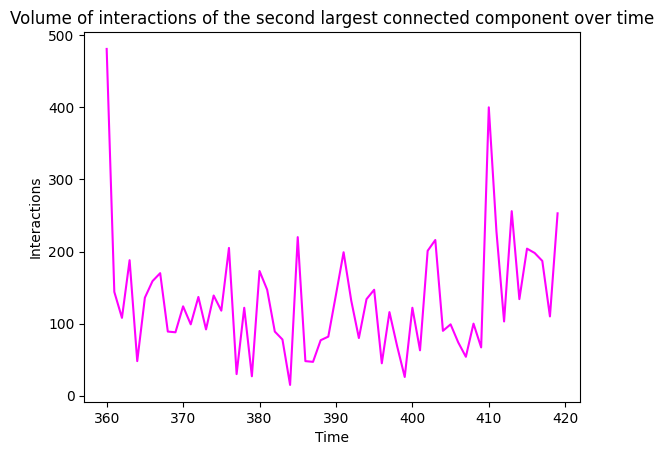

In [11]:
"""
Diagram which gives the volume of the interactions of the second largest connected component over time
"""
num_temp_edges = []
time = []

for windowed_graph in cc_subgraph.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges, color='magenta')
plt.xlabel("Time")
plt.ylabel("Interactions")
plt.title("Volume of interactions of the second largest connected component over time")
plt.grid(False)

In [4]:
import raphtory.export as ex
import json

pyvis_g = ex.to_pyvis(
    cc_subgraph, edge_color="#8e9b9e", directed=True
)

pyvis_g.show("cc_2.html")

cc_2.html
